<a href="https://colab.research.google.com/github/AnaArantesBarros/IC-2021/blob/main/IC21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv("/content/tabelaNAfix2015_2016 - Area6.csv", low_memory=False)
data.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(22752, 186)

# Adaptação dos dados


In [ ]:
data.head()

,OBJECTID_1,FID_seg_10,FID_seg_11,SPRAREA,SPRPERIMET,SPRCLASSE,FID_Canasa,GRIDCODE,Classe,FID_Urbani,COD_IBGE,OBJECTID,Area,Shape_Leng,Shape_Area,L1JA_ND,L1JA_NW,L1JA_EV,L1JA_LS,L1JA_SI,L1JA_SA,L1JA_RE,L1JA_NI,L1JA_S1,L1JA_S2,L1FE_ND,L1FE_NW,L1FE_EV,L1FE_LS,L1FE_SI,L1FE_SA,L1FE_RE,L1FE_NI,L1FE_S1,L1FE_S2,L1MA_ND,L1MA_NW,L1MA_EV,L1MA_LS,L1MA_SI,...,L2FE_NW,L2FE_EV,L2FE_LS,L2FE_SI,L2FE_SA,L2FE_RE,L2FE_NI,L2FE_S1,L2FE_S2,L2MA_ND,L2MA_NW,L2MA_EV,L2MA_LS,L2MA_SI,L2MA_SA,L2MA_RE,L2MA_NI,L2MA_S1,L2MA_S2,L2AB_ND,L2AB_NW,L2AB_EV,L2AB_LS,L2AB_SI,L2AB_SA,L2AB_RE,L2AB_NI,L2AB_S1,L2AB_S2,L2MI_ND,L2MI_NW,L2MI_EV,L2MI_LS,L2MI_SI,L2MI_SA,L2MI_RE,L2MI_NI,L2MI_S1,L2MI_S2,Classif
0,1,-1,0,0.0000,0,NaN,0,0,NaN,0,0,0,2593550.000,45983.235275,2.593550e+06,17221.883098,3235.939777,27866.743464,7233.975716,15867.797882,20831.580697,33230.429318,35960.527696,34655.907073,33738.470974,17646.285562,2878.185101,30021.213463,6607.640743,16160.612381,21497.427945,32921.860144,35698.530666,34155.140743,33280.019986,2027.821235,219.595143,3386.526367,658.698795,1838.203669,...,2830.383896,31817.376629,6626.105335,16055.735797,21490.403705,32950.647567,35672.134893,34144.115882,33280.295710,13666.344279,2089.534920,23066.563015,4895.625809,12485.966587,16686.062173,25216.786094,27422.622928,26136.347780,25503.654525,17447.270052,2967.918550,28409.878889,6945.761633,16035.557963,21169.367145,33126.466410,35563.017105,34302.187007,33480.830320,16859.247939,3098.978064,28054.160728,6994.234512,15541.814278,20374.141585,32585.744217,34752.415980,33673.861429,32916.051316,OUTROS
1,2,1,0,0.0000,0,NaN,-1,0,NaN,-1,0,0,62456.700,1201.090743,6.245669e+04,18225.362477,2356.338798,30907.717669,6636.089253,16735.109290,22336.289617,33055.641166,35723.535519,34222.861567,33392.575592,18334.364299,2326.795993,32713.105647,6442.928962,16807.706740,22499.919854,33037.275045,35742.375228,34179.575592,33340.890710,18338.062841,2284.915301,32605.546448,6667.288707,16945.558288,...,2591.797814,36207.327869,6871.897996,16712.932605,22192.200364,33039.546448,35387.502732,34138.612022,33305.925319,11510.138434,1771.189435,18201.876138,4732.433515,10629.744991,14003.728597,21638.885246,23231.118397,22440.610200,21889.677596,17923.586521,2510.180328,31208.187614,7149.987250,16579.098361,21883.402550,33037.925319,35099.140255,34064.785064,33320.103825,17732.905282,2622.794171,30850.417122,7379.692168,16496.302368,21597.213115,33056.471767,35004.047359,34083.856102,33372.761384,OUTROS
2,3,2,1,90310.7578,0,NaN,-1,0,NaN,-1,0,0,90310.800,1193.060399,9.031076e+04,12909.304678,6271.811631,16814.137800,9793.329962,12715.713021,14363.122630,33536.388116,34190.075853,34145.128951,33820.247788,13353.212389,5990.447535,18935.888748,9134.981037,12570.496839,15028.754741,33388.795196,34042.336283,33860.399494,33530.840708,13516.830594,5826.388748,18656.803413,9026.526549,12644.029709,...,5392.346397,21197.245259,9088.455120,13338.190898,16159.670038,33482.075853,34515.809102,34224.495575,33802.450063,14550.256637,4781.978508,18506.711757,8787.501896,13597.599242,16824.264222,33434.228824,34624.109987,34195.367889,33754.295828,13555.830594,5734.756005,17297.059419,9122.529709,12815.501896,15332.849557,33533.895070,34398.883691,34142.628319,33782.726928,12862.423515,6259.079646,16242.015171,9507.112516,12401.651075,14292.745891,33481.893805,34049.756005,33928.785082,33671.032870,OUTROS
3,4,3,2,91173.7930,0,NaN,-1,0,NaN,-1,0,0,862.961,203.824735,8.629612e+02,17493.100000,2884.200000,27371.300000,6257.100000,15239.300000,21238.100000,33125.300000,35272.700000,33907.100000,33363.800000,17722.800000,2701.500000,27697.200000,6422.100000,15732.900000,21582.800000,33228.100000,36356.900000,34466.400000,33612.500000,17559.700000,2836.300000,27684.300000,6701.350000,15701.100000,...,3630.500000,31452.700000,7448.000000,14855.600000,19838.200000,33396.800000,35749.300000,34529.000000,33707.900000,17897.500000,2426.300000,27277.400000,7074.600000,16517.200000,21845.000000,33115.000000,35790.900000,34410.100000,

In [ ]:
nome_col = data.dtypes.index
nome_col

Index(['OBJECTID_1', 'FID_seg_10', 'FID_seg_11', 'SPRAREA', 'SPRPERIMET',
       'SPRCLASSE', 'FID_Canasa', 'GRIDCODE', 'Classe', 'FID_Urbani',
       ...
       'L2MI_NW', 'L2MI_EV', 'L2MI_LS', 'L2MI_SI', 'L2MI_SA', 'L2MI_RE',
       'L2MI_NI', 'L2MI_S1', 'L2MI_S2', 'Classif'],
      dtype='object', length=186)

In [ ]:
data["Classif"].unique()

array(['OUTROS', 'CANA', nan], dtype=object)

In [ ]:
Cla = []
for i in data.Classif:
  if i == "CANA":
    Cla.append(1)
  else:
    Cla.append(0)
print(Cla)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
colunas = [list(range(17,186,10)),list(range(18,186,10)),list(range(19,186,10)),list(range(20,186,10)),list(range(25,186,10)),list(range(26,186,10))]
colun = [17, 27, 37, 47, 57, 67, 77, 87, 97, 107, 117, 127, 137, 147, 157, 167, 177, 18, 28, 38, 48, 58, 68, 78, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166, 176]
print(colun)

[17, 27, 37, 47, 57, 67, 77, 87, 97, 107, 117, 127, 137, 147, 157, 167, 177, 18, 28, 38, 48, 58, 68, 78, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166, 176]


In [ ]:
data["Cla"] = Cla

In [ ]:
col = []
for c in colun:
  col.append(nome_col[c])
print(col)
col.remove("Classif")

['L1JA_EV', 'L1FE_EV', 'L1MA_EV', 'L1AB_EV', 'L1MI_EV', 'L1JU_EV', 'L1JL_EV', 'L1AG_EV', 'L1SE_EV', 'L1OU_EV', 'L1NO_EV', 'L1DE_EV', 'L2JA_EV', 'L2FE_EV', 'L2MA_EV', 'L2AB_EV', 'L2MI_EV', 'L1JA_LS', 'L1FE_LS', 'L1MA_LS', 'L1AB_LS', 'L1MI_LS', 'L1JU_LS', 'L1JL_LS', 'L1AG_LS', 'L1SE_LS', 'L1OU_LS', 'L1NO_LS', 'L1DE_LS', 'L2JA_LS', 'L2FE_LS', 'L2MA_LS', 'L2AB_LS', 'L2MI_LS', 'L1JA_SI', 'L1FE_SI', 'L1MA_SI', 'L1AB_SI', 'L1MI_SI', 'L1JU_SI', 'L1JL_SI', 'L1AG_SI', 'L1SE_SI', 'L1OU_SI', 'L1NO_SI', 'L1DE_SI', 'L2JA_SI', 'L2FE_SI', 'L2MA_SI', 'L2AB_SI', 'L2MI_SI', 'L1JA_SA', 'L1FE_SA', 'L1MA_SA', 'L1AB_SA', 'L1MI_SA', 'L1JU_SA', 'L1JL_SA', 'L1AG_SA', 'L1SE_SA', 'L1OU_SA', 'L1NO_SA', 'L1DE_SA', 'L2JA_SA', 'L2FE_SA', 'L2MA_SA', 'L2AB_SA', 'L2MI_SA', 'L1FE_ND', 'L1MA_ND', 'L1AB_ND', 'L1MI_ND', 'L1JU_ND', 'L1JL_ND', 'L1AG_ND', 'L1SE_ND', 'L1OU_ND', 'L1NO_ND', 'L1DE_ND', 'L2JA_ND', 'L2FE_ND', 'L2MA_ND', 'L2AB_ND', 'L2MI_ND', 'Classif', 'L1FE_NW', 'L1MA_NW', 'L1AB_NW', 'L1MI_NW', 'L1JU_NW', 'L1JL_NW'

In [ ]:
tx = data[col].fillna(0)
tx.head()

,L1JA_EV,L1FE_EV,L1MA_EV,L1AB_EV,L1MI_EV,L1JU_EV,L1JL_EV,L1AG_EV,L1SE_EV,L1OU_EV,L1NO_EV,L1DE_EV,L2JA_EV,L2FE_EV,L2MA_EV,L2AB_EV,L2MI_EV,L1JA_LS,L1FE_LS,L1MA_LS,L1AB_LS,L1MI_LS,L1JU_LS,L1JL_LS,L1AG_LS,L1SE_LS,L1OU_LS,L1NO_LS,L1DE_LS,L2JA_LS,L2FE_LS,L2MA_LS,L2AB_LS,L2MI_LS,L1JA_SI,L1FE_SI,L1MA_SI,L1AB_SI,L1MI_SI,L1JU_SI,...,L1OU_SA,L1NO_SA,L1DE_SA,L2JA_SA,L2FE_SA,L2MA_SA,L2AB_SA,L2MI_SA,L1FE_ND,L1MA_ND,L1AB_ND,L1MI_ND,L1JU_ND,L1JL_ND,L1AG_ND,L1SE_ND,L1OU_ND,L1NO_ND,L1DE_ND,L2JA_ND,L2FE_ND,L2MA_ND,L2AB_ND,L2MI_ND,L1FE_NW,L1MA_NW,L1AB_NW,L1MI_NW,L1JU_NW,L1JL_NW,L1AG_NW,L1SE_NW,L1OU_NW,L1NO_NW,L1DE_NW,L2JA_NW,L2FE_NW,L2MA_NW,L2AB_NW,L2MI_NW
0,27866.743464,30021.213463,3386.526367,28786.505938,28068.316139,27559.123948,26276.752991,24610.066870,25403.967695,26535.612559,11883.969512,3181.041877,25435.804263,31817.376629,23066.563015,28409.878889,28054.160728,7233.975716,6607.640743,658.698795,7207.020739,7218.788177,7483.305282,7937.584419,8376.500487,8245.565896,8099.725649,2476.873925,777.711336,4934.814633,6626.105335,4895.625809,6945.761633,6994.234512,15867.797882,16160.612381,1838.203669,15862.990517,15912.563237,15787.519144,...,19570.112116,6183.613356,2422.507977,14565.548081,21490.403705,16686.062173,21169.367145,20374.141585,17646.285562,2027.821235,17117.085438,17078.230524,16823.084995,16493.581317,15984.861695,15845.635159,16380.889391,5241.077595,1998.127315,12137.141009,17642.563591,13666.344279,17447.270052,16859.247939,2878.185101,219.595143,3344.891784,3317.672915,3433.518789,3665.232562,3985.439865,3990.346362,3769.246433,1584.600727,316.481033,2912.341266,2830.383896,2089.534920,2967.918550,3098.978064
1,30907.717669,32713.105647,32605.546448,32497.987250,31690.642987,30914.391621,28168.562841,26740.134791,28061.766849,30559.373406,31090.451730,31621.530055,32152.608379,36207.327869,18201.876138,31208.187614,30850.417122,6636.089253,6442.928962,6667.288707,6891.648452,6979.324226,7222.550091,8074.624772,8388.648452,8237.127505,7288.367942,7127.163934,6965.959927,6804.755920,6871.897996,4732.433515,7149.987250,7379.692168,16735.109290,16807.706740,16945.558288,17083.409836,17051.061931,16671.280510,...,20641.431694,21383.927747,22126.423801,22868.919854,22192.200364,14003.728597,21883.402550,21597.213115,18334.364299,18338.062841,18341.761384,18305.120219,17933.639344,17352.234973,16791.599271,16962.431694,17095.202186,17590.339405,18085.476624,18580.613843,18129.420765,11510.138434,17923.586521,17732.905282,2326.795993,2284.915301,2243.034608,2275.275046,2492.897996,2827.781421,3246.291439,3273.621129,3168.500911,2804.479053,2440.457195,2076.435337,2591.797814,1771.189435,2510.180328,2622.794171
2,16814.137800,18935.888748,18656.803413,18377.718078,17441.728192,16312.604298,16627.883691,15285.448799,17602.514539,17126.204804,26037.227560,21410.621365,16784.015171,21197.245259,18506.711757,17297.059419,16242.015171,9793.329962,9134.981037,9026.526549,8918.072061,9324.031606,9515.539823,9742.070796,9905.854614,9508.597977,9824.318584,9049.176991,9414.197219,9779.217446,9088.455120,8787.501896,9122.529709,9507.112516,12715.713021,12570.496839,12644.029709,12717.562579,13122.554994,12537.740834,...,14228.318584,14692.125158,15170.653603,15649.182048,16159.670038,16824.264222,15332.849557,14292.745891,13353.212389,13516.830594,13680.448799,13702.571429,12976.056890,12954.091024,12365.044248,13334.624526,12819.340076,13128.561315,13447.683312,13766.805310,14107.092288,14550.256637,13555.830594,12862.423515,5990.447535,5826.388748,5662.329962,5481.319848,6197.027813,6197.666245,6675.046776,5922.754741,6381.896334,6627.747156,5976.714918,5325.682680,5392.346397,4781.978508,5734.756005,6259.079646
3,27371.300000,27697.200000,27684.300000,27671.400000,26449.500000,20391.700000,19425.900000,18544.000000,19094.400000,21557.500000,22570.333333,23583.166667,24596.000000,31452.700000,27277.400000,26630.500000,23852.600000,6257.100000,6422.100000,6701.350000,6980.600000,7115.100000,9379.200000,9772.800000,10007.000000,10091.30

In [ ]:
all = col
all.append("Cla")
print(all)

['L1JA_EV', 'L1FE_EV', 'L1MA_EV', 'L1AB_EV', 'L1MI_EV', 'L1JU_EV', 'L1JL_EV', 'L1AG_EV', 'L1SE_EV', 'L1OU_EV', 'L1NO_EV', 'L1DE_EV', 'L2JA_EV', 'L2FE_EV', 'L2MA_EV', 'L2AB_EV', 'L2MI_EV', 'L1JA_LS', 'L1FE_LS', 'L1MA_LS', 'L1AB_LS', 'L1MI_LS', 'L1JU_LS', 'L1JL_LS', 'L1AG_LS', 'L1SE_LS', 'L1OU_LS', 'L1NO_LS', 'L1DE_LS', 'L2JA_LS', 'L2FE_LS', 'L2MA_LS', 'L2AB_LS', 'L2MI_LS', 'L1JA_SI', 'L1FE_SI', 'L1MA_SI', 'L1AB_SI', 'L1MI_SI', 'L1JU_SI', 'L1JL_SI', 'L1AG_SI', 'L1SE_SI', 'L1OU_SI', 'L1NO_SI', 'L1DE_SI', 'L2JA_SI', 'L2FE_SI', 'L2MA_SI', 'L2AB_SI', 'L2MI_SI', 'L1JA_SA', 'L1FE_SA', 'L1MA_SA', 'L1AB_SA', 'L1MI_SA', 'L1JU_SA', 'L1JL_SA', 'L1AG_SA', 'L1SE_SA', 'L1OU_SA', 'L1NO_SA', 'L1DE_SA', 'L2JA_SA', 'L2FE_SA', 'L2MA_SA', 'L2AB_SA', 'L2MI_SA', 'L1FE_ND', 'L1MA_ND', 'L1AB_ND', 'L1MI_ND', 'L1JU_ND', 'L1JL_ND', 'L1AG_ND', 'L1SE_ND', 'L1OU_ND', 'L1NO_ND', 'L1DE_ND', 'L2JA_ND', 'L2FE_ND', 'L2MA_ND', 'L2AB_ND', 'L2MI_ND', 'L1FE_NW', 'L1MA_NW', 'L1AB_NW', 'L1MI_NW', 'L1JU_NW', 'L1JL_NW', 'L1AG_NW'

In [ ]:
main = data[all] 
print(main)

            L1JA_EV       L1FE_EV       L1MA_EV  ...      L2AB_NW      L2MI_NW  Cla
0      27866.743464  30021.213463   3386.526367  ...  2967.918550  3098.978064    0
1      30907.717669  32713.105647  32605.546448  ...  2510.180328  2622.794171    0
2      16814.137800  18935.888748  18656.803413  ...  5734.756005  6259.079646    0
3      27371.300000  27697.200000  27684.300000  ...  2915.900000  3265.200000    0
4      20578.467980    706.522167  13139.837438  ...  4057.965517  4494.591133    0
...             ...           ...           ...  ...          ...          ...  ...
22747  19445.612313  28885.732113  30223.430532  ...  2777.440100  2912.630616    1
22748  27788.178218  28978.287129  29203.603960  ...  3295.079208  3428.138614    1
22749  28341.742780  29474.749496  29294.920416  ...  3393.248489  3556.492277    1
22750  13676.490695  13709.491935  16216.500931  ...  5022.353598  4718.633375    1
22751  31459.260941  31960.281182  23338.579869  ...          NaN          N

# Separação do banco de dados


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(main, test_size=0.2)

In [ ]:
y_train = train["Cla"]
y_test = test["Cla"]
print(y_test)

21723    1
6773     0
6804     0
6194     0
15580    0
        ..
10624    0
21555    1
7895     0
10081    0
17807    1
Name: Cla, Length: 4551, dtype: int64


In [ ]:
x_train = train[col]
x_train = x_train.drop("Cla", axis=1)
x_test = test[col]
x_test = x_test.drop("Cla", axis=1)
print(x_test)

            L1JA_EV       L1FE_EV  ...      L2AB_NW      L2MI_NW
21723  32489.819068   8553.544885  ...  2573.950592  3235.495477
6773   27665.750693  30171.140582  ...  5134.921745  5157.638504
6804   33064.253108  34401.701599  ...  2035.925400  2142.112789
6194   29334.939759  19080.463102  ...  2733.556476  3511.227410
15580  28973.823500  28598.593500  ...  2783.799500  3094.256000
...             ...           ...  ...          ...          ...
10624  27380.388797  26356.437397  ...  2943.336079  3275.451400
21555  25771.789474  29155.368421  ...  4521.842105  3829.157895
7895   34679.786288  26409.783074  ...  1748.023032  1999.038029
10081  22728.311332  22674.041472  ...  4882.044977  3647.788551
17807  26214.816580  20595.305700  ...  3741.874611  3369.793782

[4551 rows x 100 columns]


In [ ]:
X = x_train.fillna(0)
y = y_train.fillna(0)

In [ ]:
X

,L1JA_EV,L1FE_EV,L1MA_EV,L1AB_EV,L1MI_EV,L1JU_EV,L1JL_EV,L1AG_EV,L1SE_EV,L1OU_EV,L1NO_EV,L1DE_EV,L2JA_EV,L2FE_EV,L2MA_EV,L2AB_EV,L2MI_EV,L1JA_LS,L1FE_LS,L1MA_LS,L1AB_LS,L1MI_LS,L1JU_LS,L1JL_LS,L1AG_LS,L1SE_LS,L1OU_LS,L1NO_LS,L1DE_LS,L2JA_LS,L2FE_LS,L2MA_LS,L2AB_LS,L2MI_LS,L1JA_SI,L1FE_SI,L1MA_SI,L1AB_SI,L1MI_SI,L1JU_SI,...,L1OU_SA,L1NO_SA,L1DE_SA,L2JA_SA,L2FE_SA,L2MA_SA,L2AB_SA,L2MI_SA,L1FE_ND,L1MA_ND,L1AB_ND,L1MI_ND,L1JU_ND,L1JL_ND,L1AG_ND,L1SE_ND,L1OU_ND,L1NO_ND,L1DE_ND,L2JA_ND,L2FE_ND,L2MA_ND,L2AB_ND,L2MI_ND,L1FE_NW,L1MA_NW,L1AB_NW,L1MI_NW,L1JU_NW,L1JL_NW,L1AG_NW,L1SE_NW,L1OU_NW,L1NO_NW,L1DE_NW,L2JA_NW,L2FE_NW,L2MA_NW,L2AB_NW,L2MI_NW
6251,29511.960291,31297.727995,31805.338518,32312.949040,32480.027796,32257.270020,31901.001985,29575.317009,27036.774983,28641.610854,7126.365321,15476.808405,23827.251489,15527.508273,16434.121112,19528.820649,19161.208471,6581.572469,5786.320979,5726.186300,5666.051621,5357.285903,5445.023825,5789.089345,6549.856386,6612.559894,7507.824619,1403.054269,5481.319656,9559.585043,11451.094639,9542.708802,10065.160821,10412.361350,16494.735275,16834.624090,16776.987426,16719.350761,16994.389808,16807.965586,...,21088.050960,3245.009927,9909.989742,16574.969557,14854.547320,15388.367968,17507.755791,17239.485109,18521.603574,18521.762409,18521.921244,18731.569159,18609.864990,18535.989411,17948.663137,15509.578425,17393.088683,2776.680344,8580.139643,14383.598941,13236.532760,13277.123759,15005.614825,14826.820649,1792.186631,1782.845136,1773.503640,1544.143613,1627.793514,1630.598941,2050.444077,2299.524818,2646.459298,894.899404,3057.189279,5219.479153,5384.510920,4070.433488,4395.297816,4421.750496
18090,24131.442290,29393.326870,29281.815328,29170.303786,27919.619575,27475.236380,25513.007387,21862.108033,12989.619575,15807.842105,20570.385965,25332.929825,25951.532779,24504.506925,25495.291320,26486.075716,23288.005540,8131.901200,6423.228070,6634.408126,6845.588181,6737.674054,6927.555863,7381.096953,8237.139428,11883.397969,11160.879963,9434.082179,7707.284395,7195.664820,6342.167128,6865.757618,7389.348107,8077.521699,15030.577101,15431.519852,15613.147276,15794.774700,15885.408126,15420.375808,...,15143.127424,17752.967221,20362.807017,21350.833795,17550.831025,19079.819021,20608.807017,19682.300092,17538.395198,17543.190212,17547.985226,17662.808864,17245.177285,16819.235457,15654.753463,11909.024931,13428.998153,15169.097876,16909.197599,17568.227147,14548.327793,15810.860572,17073.393352,16455.741459,2979.505078,2940.786704,2902.068329,2817.837488,3157.552170,3503.613112,4332.116343,6332.791320,5375.036934,4325.309788,3275.582641,2693.806094,2852.846722,3081.653278,3310.459834,3675.509695
12248,27160.453954,28008.633488,27771.844186,27535.054884,26345.136744,26046.886512,24868.768372,21413.684651,17215.280930,23231.423256,25997.733023,28764.042791,24791.320000,27134.169302,24695.789767,25434.418605,23286.106977,7022.853953,5607.863256,6366.113023,7124.362791,7165.463256,7585.459535,8157.606512,8840.069767,6928.930233,8704.147907,7853.253953,7002.360000,7947.968372,7751.112558,5339.931163,7411.227907,8373.346977,15094.281860,14307.077209,15013.366046,15719.654884,15641.895814,15560.247442,...,18314.786047,19117.593953,19920.401860,20483.403721,19306.205581,19020.289302,20557.114419,19316.222326,16404.798139,16873.660465,17342.522791,17279.147907,16996.542326,16648.153488,15401.830698,11529.208372,15543.728372,16078.982791,16614.237209,16989.767442,16204.833488,15574.219535,17038.988837,16211.773023,2753.311628,2967.648837,3181.986047,3162.482791,3313.151628,3553.274419,4261.106977,3436.693023,4293.390698,4091.753023,3890.115349,3187.026977,4033.370233,2411.813023,3233.746977,3755.062326
4229,26357.593583,27817.962567,28315.283422,28812.604278,27333.695187,26097.326203,23769.802139,20719.502674,21322.326203,23192.422460,23250.417112,23308.411765,23366.406417,23424.401069,24349.818182,24729.540107,24573.951872,6489.796791,6135.021390,6201.895722,6268.770053,6501.812834,7073.331551,7852.919

# Regressão Logística


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_train.unique()

array([0, 1])

In [ ]:
rdf = LogisticRegression(random_state=0).fit(X, y)
rdf.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7527608373166309

In [ ]:
x_test = x_test.fillna(0)
x_test = x_test.fillna(0)

In [ ]:
rdf.score(x_test, y_test)

0.7464293561854537

In [ ]:
x_train = x_train.fillna(0)
y_train = y_train.fillna(0)

In [ ]:
rdf.score(x_train, y_train)

0.7527608373166309

# Árvores de classificação

In [ ]:
from sklearn import tree
arvore = tree.DecisionTreeClassifier()
arvore = arvore.fit(X, y)

In [ ]:
score = arvore.score(x_test, y_test)
print(score)

0.7319270490002198


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clf_pruned = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

[Text(167.4, 190.26, 'X[43] <= 14813.688\ngini = 0.412\nsamples = 18201\nvalue = [12929, 5272]'),
 Text(83.7, 135.9, 'X[1] <= 27387.582\ngini = 0.491\nsamples = 9793\nvalue = [5566, 4227]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 25955.191\ngini = 0.448\nsamples = 5470\nvalue = [3615, 1855]'),
 Text(20.925, 27.180000000000007, 'gini = 0.41\nsamples = 4415\nvalue = [3144, 1271]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.494\nsamples = 1055\nvalue = [471, 584]'),
 Text(125.55000000000001, 81.53999999999999, 'X[92] <= 4490.99\ngini = 0.495\nsamples = 4323\nvalue = [1951, 2372]'),
 Text(104.625, 27.180000000000007, 'gini = 0.48\nsamples = 1294\nvalue = [777, 517]'),
 Text(146.475, 27.180000000000007, 'gini = 0.475\nsamples = 3029\nvalue = [1174, 1855]'),
 Text(251.10000000000002, 135.9, 'X[22] <= 11424.172\ngini = 0.218\nsamples = 8408\nvalue = [7363, 1045]'),
 Text(209.25, 81.53999999999999, 'X[7] <= 15708.709\ngini = 0.173\nsamples = 7979\nvalue = [7217, 762]'),
 Text(1

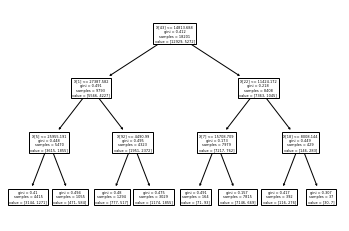

In [ ]:
tree.plot_tree(clf_pruned) 

In [ ]:
score = clf_pruned.score(x_test, y_test)
print(score)

0.7479674796747967
